In [1]:
import nltk
import numpy as np
import pandas as pd
from nltk import FreqDist
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
from datasets import load_dataset, load_metric
import matplotlib.ticker as ticker

In [2]:
datasets = load_dataset('glue', 'stsb')
data = pd.DataFrame(datasets['train'])
Exploration = data
Exploration.head()


,sentence1,sentence2,label,idx
0,A plane is taking off.,An air plane is taking off.,5.00,0
1,A man is playing a large flute.,A man is playing a flute.,3.80,1
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80,2
3,Three men are playing chess.,Two men are playing chess.,2.60,3
4,A man is playing the cello.,A man seated is playing the cello.,4.25,4


In [4]:

#Lemmatization Function
def POS_Wordnet(POS_tag_):
    if POS_tag_.startswith('J'):
        return wordnet.ADJ
    elif POS_tag_.startswith('V'):
        return wordnet.VERB
    elif POS_tag_.startswith('N'):
        return wordnet.NOUN
    elif POS_tag_.startswith('R'):
        return wordnet.ADV
    else:         
        return wordnet.NOUN
       
def lemmatize_sent(sentence):
    token_list = word_tokenize(sentence)
    pos_tags = pos_tag(token_list)
    lemma = [WordNetLemmatizer().lemmatize(word, POS_Wordnet(POS_tag_)) for word, POS_tag_ in pos_tags]
    sentence_lemma = ' '.join(lemma)
    return word_tokenize(sentence_lemma)

<BarContainer object of 9 artists>


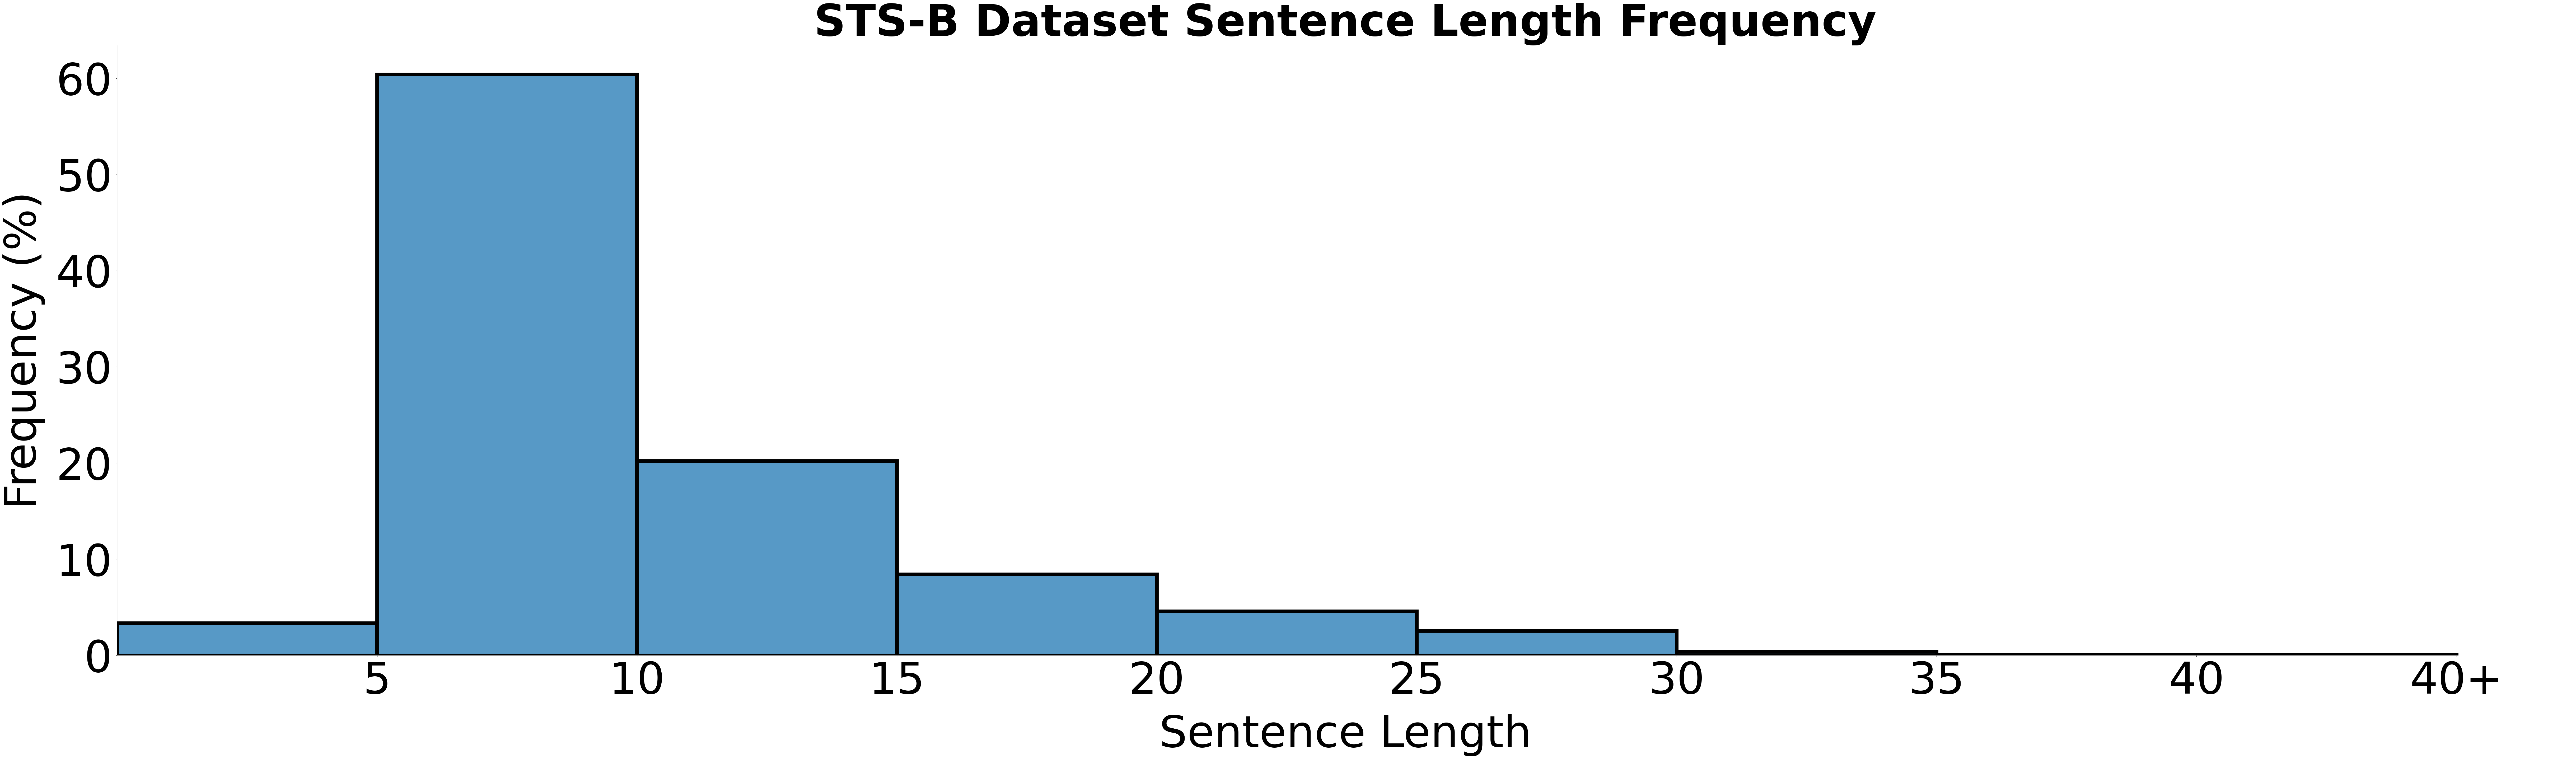

In [5]:

x  = Exploration['sentence1']
y  = Exploration['sentence2']

sent = []
sent.extend(x)
sent.extend(y)
#print(sent)
all_STS = []
sent1_STS = []
sent2_STS = []
all_STS_less = []
all_STS_more = []

for i in sent:
    word  = []
    word.extend(i.split())
    if len(word) < 40:
        all_STS_less.append(len(word))
        all_STS.append(len(word))
    else:
        #print(len(word))
        all_STS_more.append(41)
        all_STS.append(41)

all_fdist = FreqDist(all_STS)

## Conversion to Pandas series 
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(120,30))
all_plot = sns.histplot(data=all_STS,  bins = np.arange(0, max(all_STS)+5,5) ,stat ='percent',  edgecolor ='black', linewidth = 10)
all_plot.tick_params(left=True, bottom = True,labelsize=120,pad= 10)


jj = ax.containers[0]
#print(jj)
all_plot.set_xlabel("Sentence Length",fontsize=120, labelpad = 30)
all_plot.set_ylabel("Frequency (%)",fontsize=120, labelpad = 30)
all_plot.set_title('STS-B Dataset Sentence Length Frequency',fontsize=120, weight ='bold', pad = 10)
all_plot.xaxis.set_ticks(np.arange(5, max(all_STS)+5, 5))
all_plot.yaxis.set_ticks(np.arange(0 ,70 ,10))

p = all_plot.patches
heights = ["height%d" % i for i in range(len(p))]


plt.xticks(rotation=0);
plt.xlim(0)
plt.xticks(rotation=0);
plt.xlim(0)
a=all_plot.get_xticks().tolist()
a[-1]='40+'
all_plot.set_xticklabels(a)

sns.despine(right=True, left = False, bottom = True)

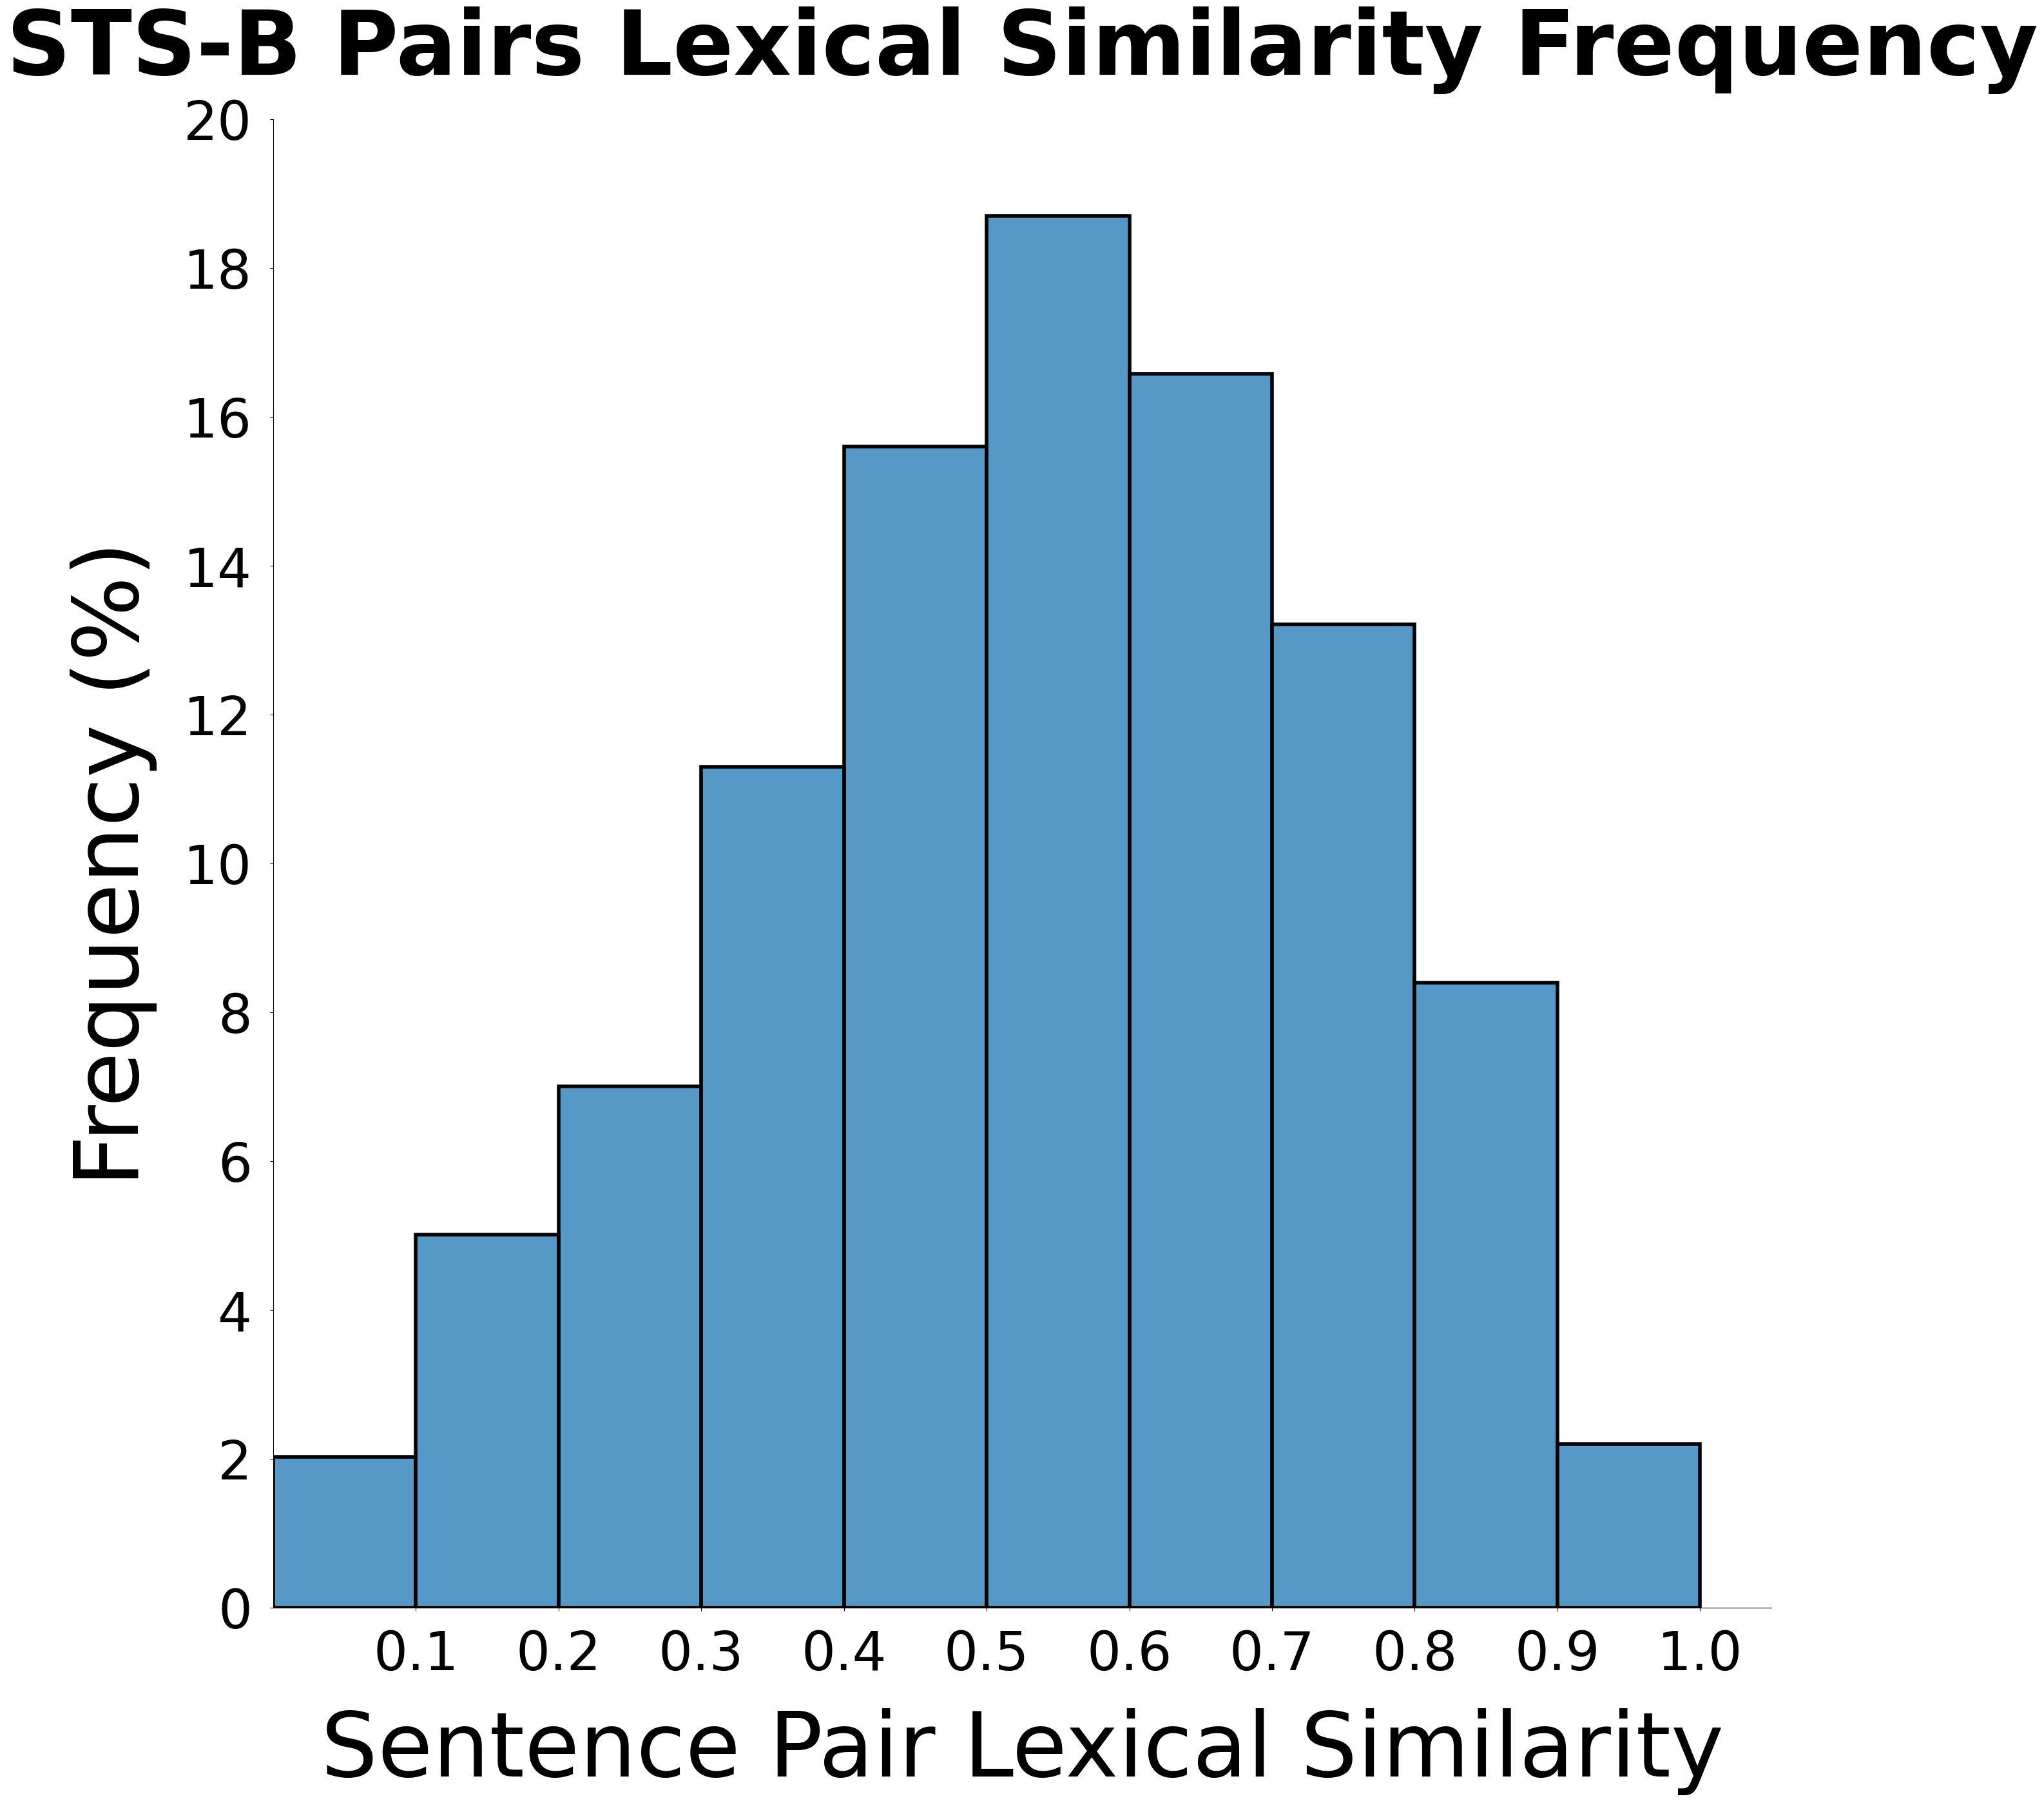

In [6]:
#average token similarity
x  = Exploration['sentence1']
y  = Exploration['sentence2']
y=list(y)
x=list(x)
sen_x = []
sen_y =[]
def stop_list(x):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(['would','could','dont','us'])
    tokens_stop = []

    ## Check if token in stop word list before adding to new list
    
    for word in x.split():
        if word.lower().isalpha() in stopwords:
            pass
        else:
            tokens_stop.append(word)
    return(tokens_stop)

Sim = []

for i in range (len(x)):
    try:
        count = 0
        sent__1 = stop_list(x[i])
        sent__2 = stop_list(y[i])
        memory = []
        for j in sent__1:
            #print(j)
            #print(y[i].split())
            mem_q = []
            for q in sent__2:
                mem_q.append(q.lower())
                if j.lower() == q.lower():

                    if  memory.count(j.lower()) +1 ==  mem_q.count(q.lower()):
                        #print(j)
                        memory.append(j.lower())
                        count+= 1
        Sim.append(((count/ len(sent__1))+ (count/ len(sent__2)))/2)
    except:
        print(i)

all_fdist = FreqDist(Sim)

## Conversion to Pandas series
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(30,30))
all_plot = sns.histplot(data=Sim,  bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] , stat="percent", edgecolor ='black', linewidth = 4)
sns.despine(right=True);
all_plot.tick_params(left=True, bottom = True,labelsize=60, pad = 20)

all_plot.set_title('STS-B Pairs Lexical Similarity Frequency',fontsize=100, weight ='bold', pad = 50)
all_plot.set_xlabel("Sentence Pair Lexical Similarity",fontsize=100,labelpad = 30) # , weight ='bold')
all_plot.set_ylabel("Frequency (%)",fontsize=100,labelpad = 30, color = 'black') #, weight ='bold')
all_plot.xaxis.set_ticks(np.arange(0.1, 1.1, 0.1))
all_plot.yaxis.set_ticks(np.arange(0 ,22 ,2))
plt.xlim(0)
plt.xticks(rotation=0);
        

In [9]:
nltk.download('omw-1.4')
ALl_words_token = []
for i in range (len (Exploration['sentence1'])):
    ALl_words_token.extend(lemmatize_sent(Exploration['sentence1'][i]))
for i in range (len (Exploration['sentence2'])):
    ALl_words_token.extend(lemmatize_sent(Exploration['sentence2'][i]))

[nltk_data] Downloading package omw-1.4 to /home/ofabunmi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


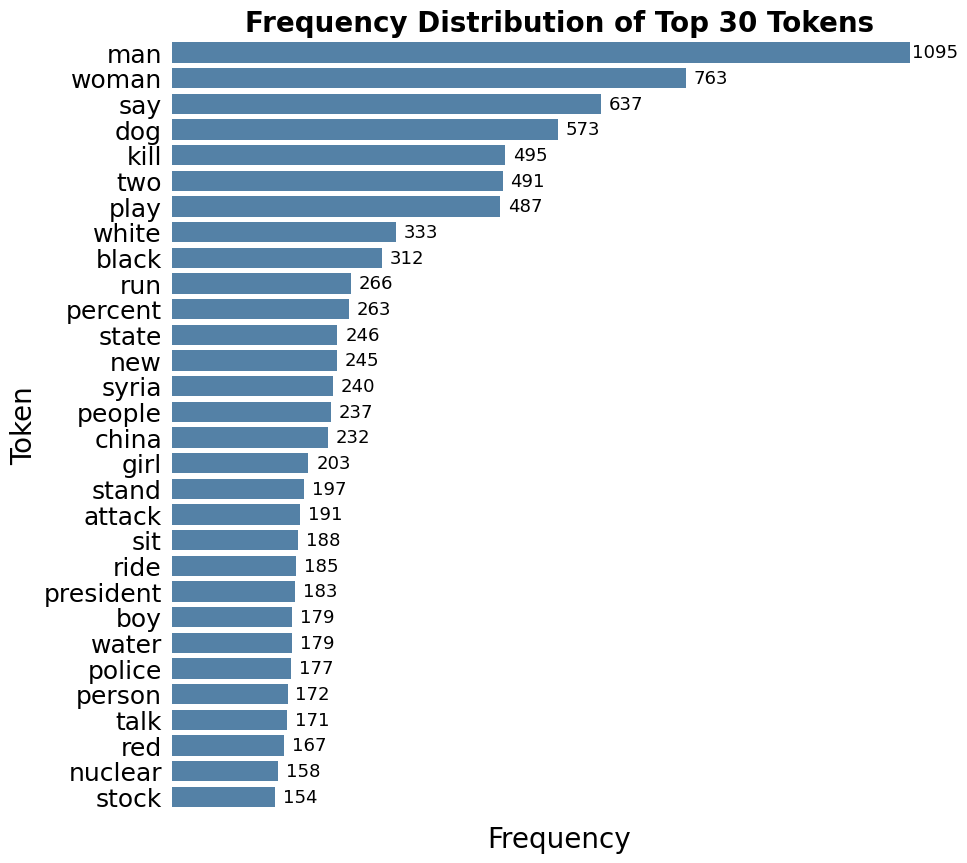

In [25]:
#frequency distribution after lematization
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['would','could','dont','us'])
all_tokens_stop = []

## Check if token in stop word list before adding to new list
for word in ALl_words_token:
    if word.lower() in stopwords:
        pass
    elif word.lower().isalpha():
        all_tokens_stop.append(word.lower())
all_tokens_stop = [x.replace('rid', 'ride') for x in all_tokens_stop] 

import nltk
from nltk import FreqDist
import seaborn as sns 
import matplotlib.pyplot as plt
all_fdist = FreqDist(all_tokens_stop).most_common(30)
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(10,10))


all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax,color = 'steelblue')
all_plot.xaxis.set_ticklabels([])
all_plot.tick_params(left=False, bottom = False,labelsize=18)

for i, v in enumerate(all_fdist.values):
    all_plot.text( v+37,i+0.2,  str(v), ha='center',fontsize=13)

all_plot.set(ylabel = 'Words in the dataset', xlabel =' Frequency')#, 'Values')
all_plot.set_xlabel("Frequency",fontsize=20)
all_plot.set_ylabel("Token",fontsize=20)
all_plot.set_title('Frequency Distribution of Top 30 Tokens',fontsize=20, weight ='bold')
plt.xticks(rotation=0)
sns.despine(right=True, left = True, bottom = True)
  

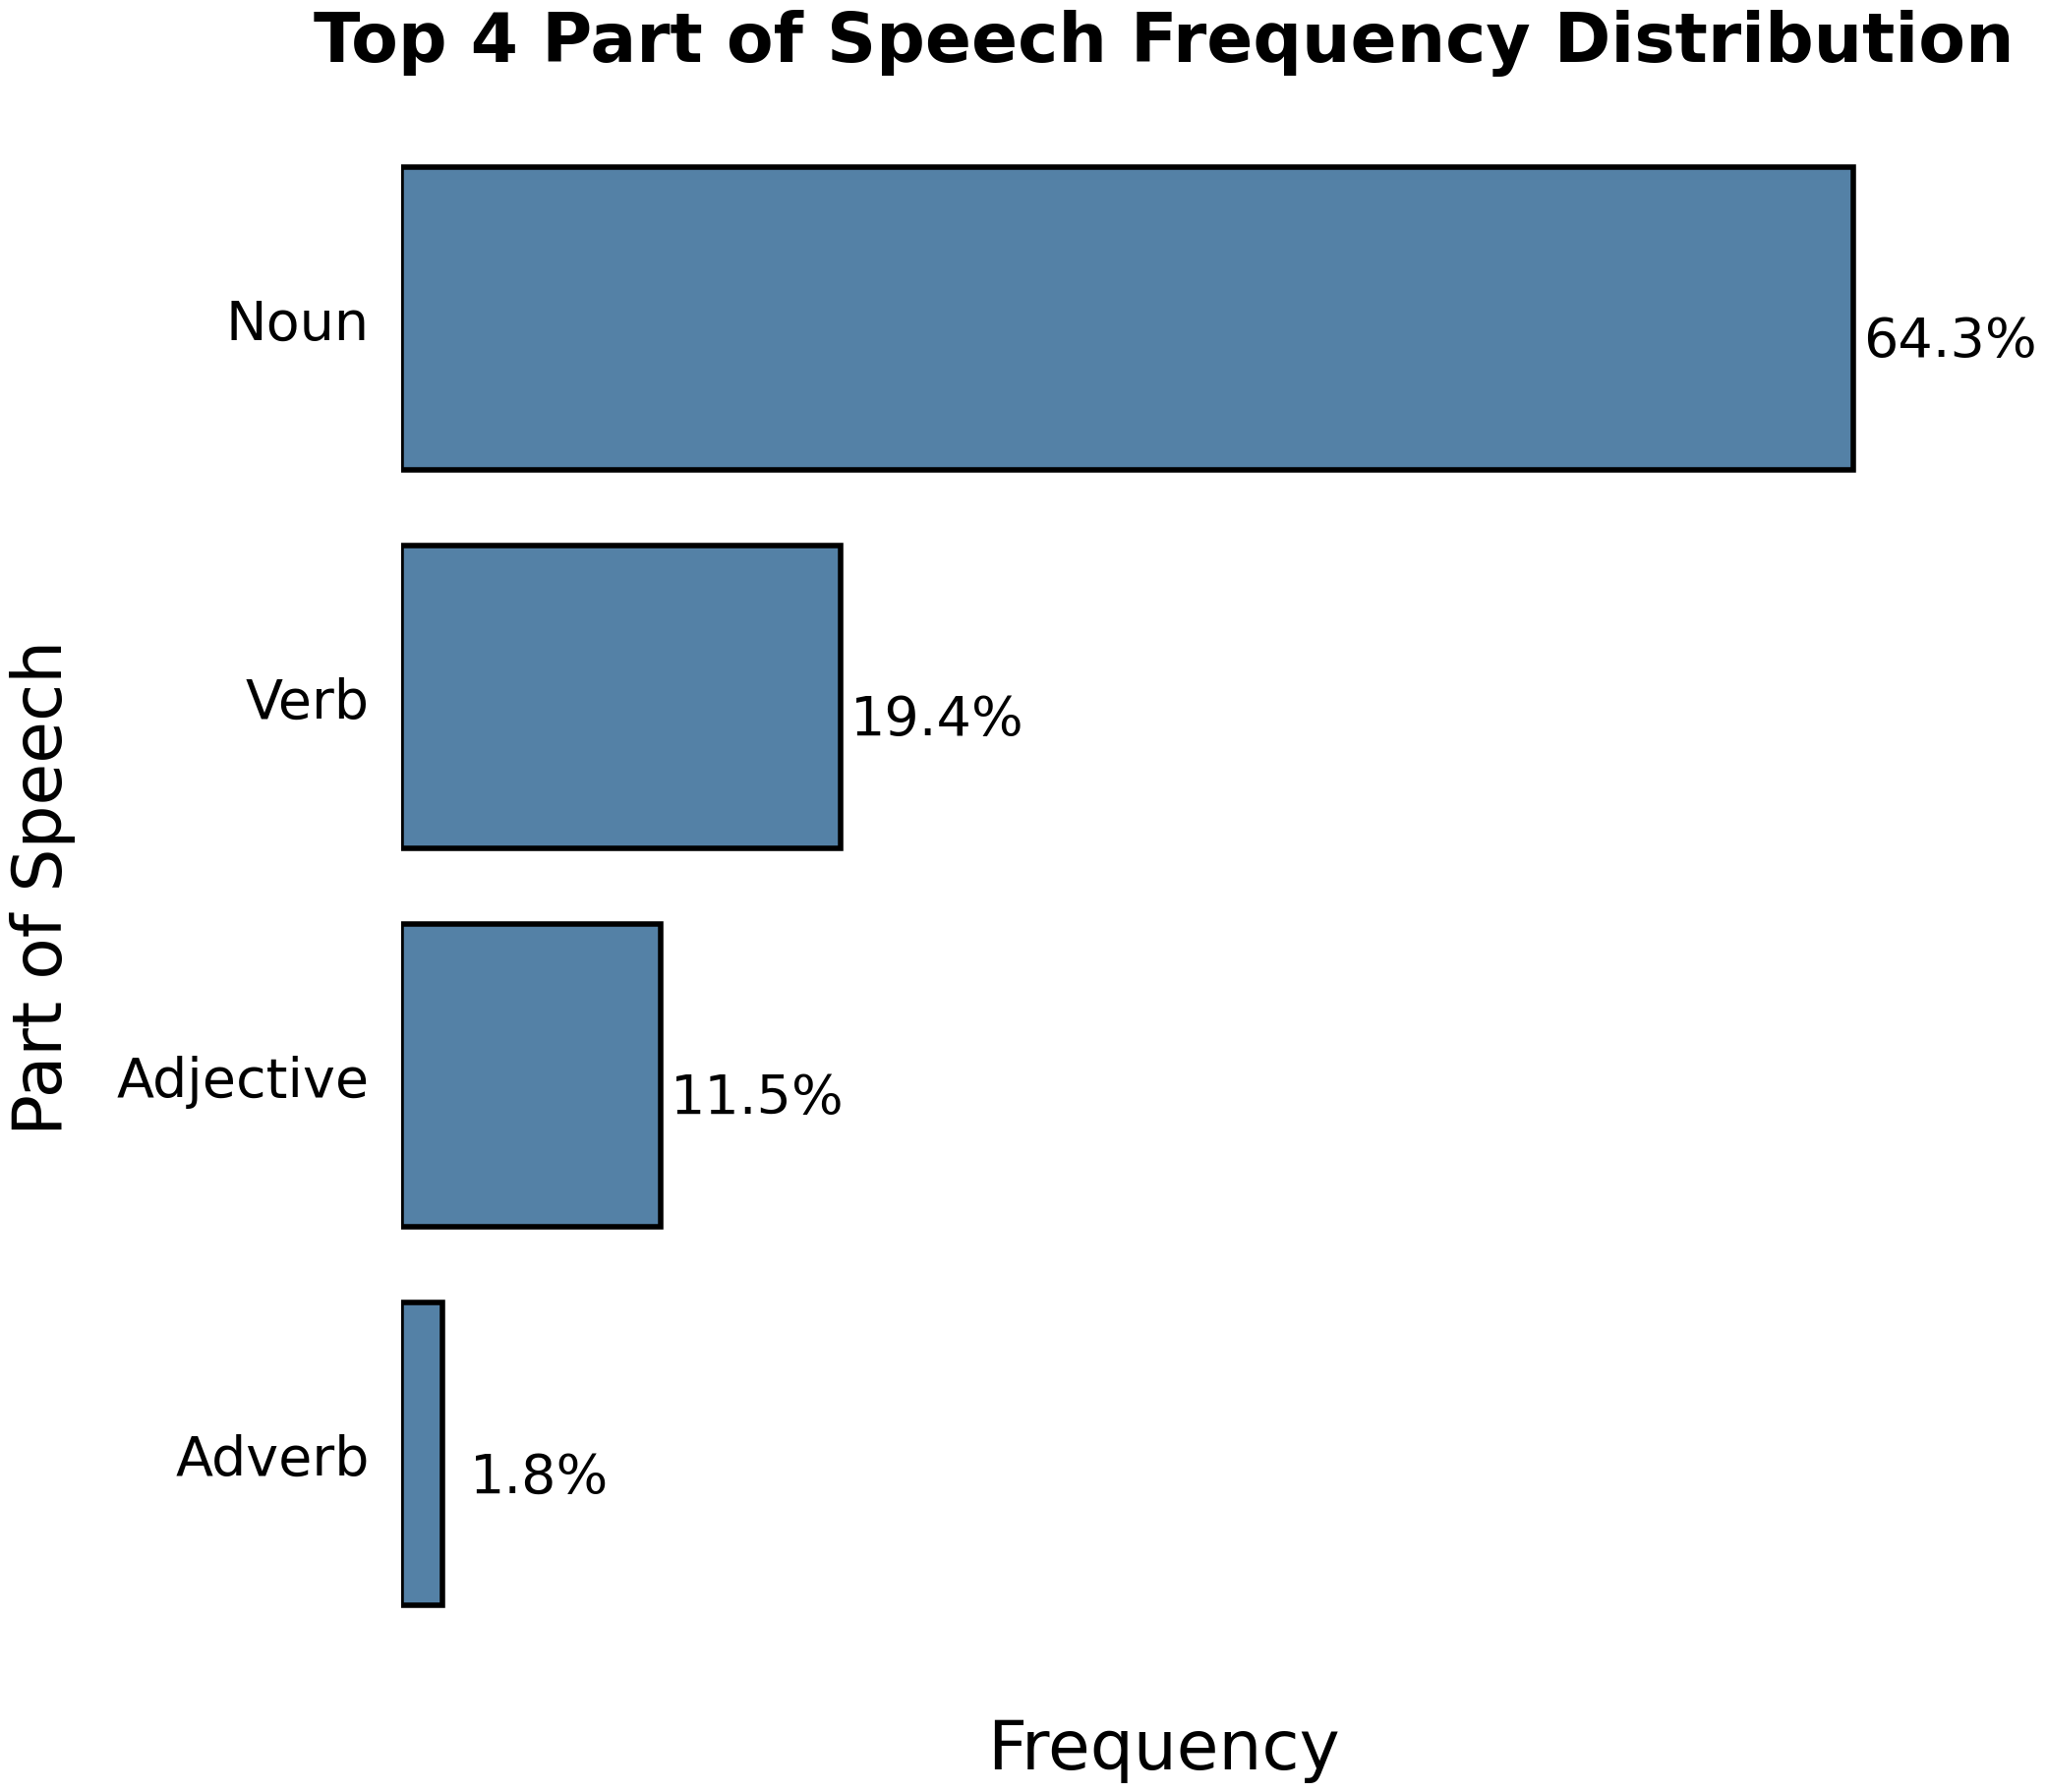

In [27]:
#nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import seaborn as sns 
import matplotlib.pyplot as plt

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['would','could','dont','us'])
POS_tokens_stop = []
All_sent = [ ] 
All_sent.extend(Exploration['sentence1'])
All_sent.extend(Exploration['sentence2'])

## Check if token in stop word list before adding to new list
for x in All_sent:
    token = word_tokenize(str(x))
    POS = nltk.pos_tag(token)
    for x in POS:
        if x[0].lower() in stopwords:
            pass
        elif x[0].isalpha():
            POS_tokens_stop.append(x[1])

combined_POS= []

for i in POS_tokens_stop:
    #print(i)
    if 'NN' in i:
        combined_POS.append('Noun')
        #print('NN')
    elif 'V' in i:
        combined_POS.append('Verb')
        #print('V')
    elif 'RB' in i:
        combined_POS.append('Adverb')
        #print('RB')
    elif 'PRP' in i:
        combined_POS.append('Pronoun')
        #print('PRon')
    elif 'JJ' in i:
        combined_POS.append('Adjective')
        #print('JJ')
    elif 'DT' in i:
        combined_POS.append('Determinant')
        #print('DT')
    elif 'MD' in i:
        combined_POS.append('Modal')
    elif 'IN' in i:
        combined_POS.append('Preposition') 
    elif 'CD' in i:
        combined_POS.append('Cardinal Digit')
    elif 'RP' in i:
        combined_POS.append('Article')
    else:
        combined_POS.append(i)
    
all_fdist = FreqDist(combined_POS).most_common(4)
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(20,20))

all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, color = 'steelblue', edgecolor = 'black', linewidth = 4)
all_plot.xaxis.set_ticklabels([])
all_plot.tick_params(left=False, bottom = False,labelsize=40, pad = 20)

for i, v in enumerate(all_fdist.values):
    all_plot.text( v+3000,i+0.1,  str((round((v/len(combined_POS))*100,1)))+'%', ha='center',fontsize=40)


all_plot.set_xlabel("Frequency",fontsize=50,labelpad = 30)
all_plot.set_ylabel("Part of Speech",fontsize=50,labelpad = 30)
all_plot.set_title('Top 4 Part of Speech Frequency Distribution',fontsize=50,pad =50, weight ='bold')
plt.xticks(rotation=0)
sns.despine(right=True, left = True, bottom = True)


In [29]:
Initial = (r"EA Data/EMPATHIC ACCURACY DATASET.xlsx")
df = pd.DataFrame()

U = []
D = []
Avg =[]
data = pd.read_excel(Initial)

for i in range(0,len(data["Designer's guess"])):

    User = (str(data["User's thoughts or feelings"][i]).lower())#.replace(':','').replace('i was', '').replace('s/he was', '').replace('she was', '').replace('he was', '')
    Des = (str(data["Designer's guess"][i]).lower())#.replace(':','').replace('i was', '').replace('s/he was', '').replace('she was', '').replace('he was', '')
    U.append(User)
    D.append(Des)


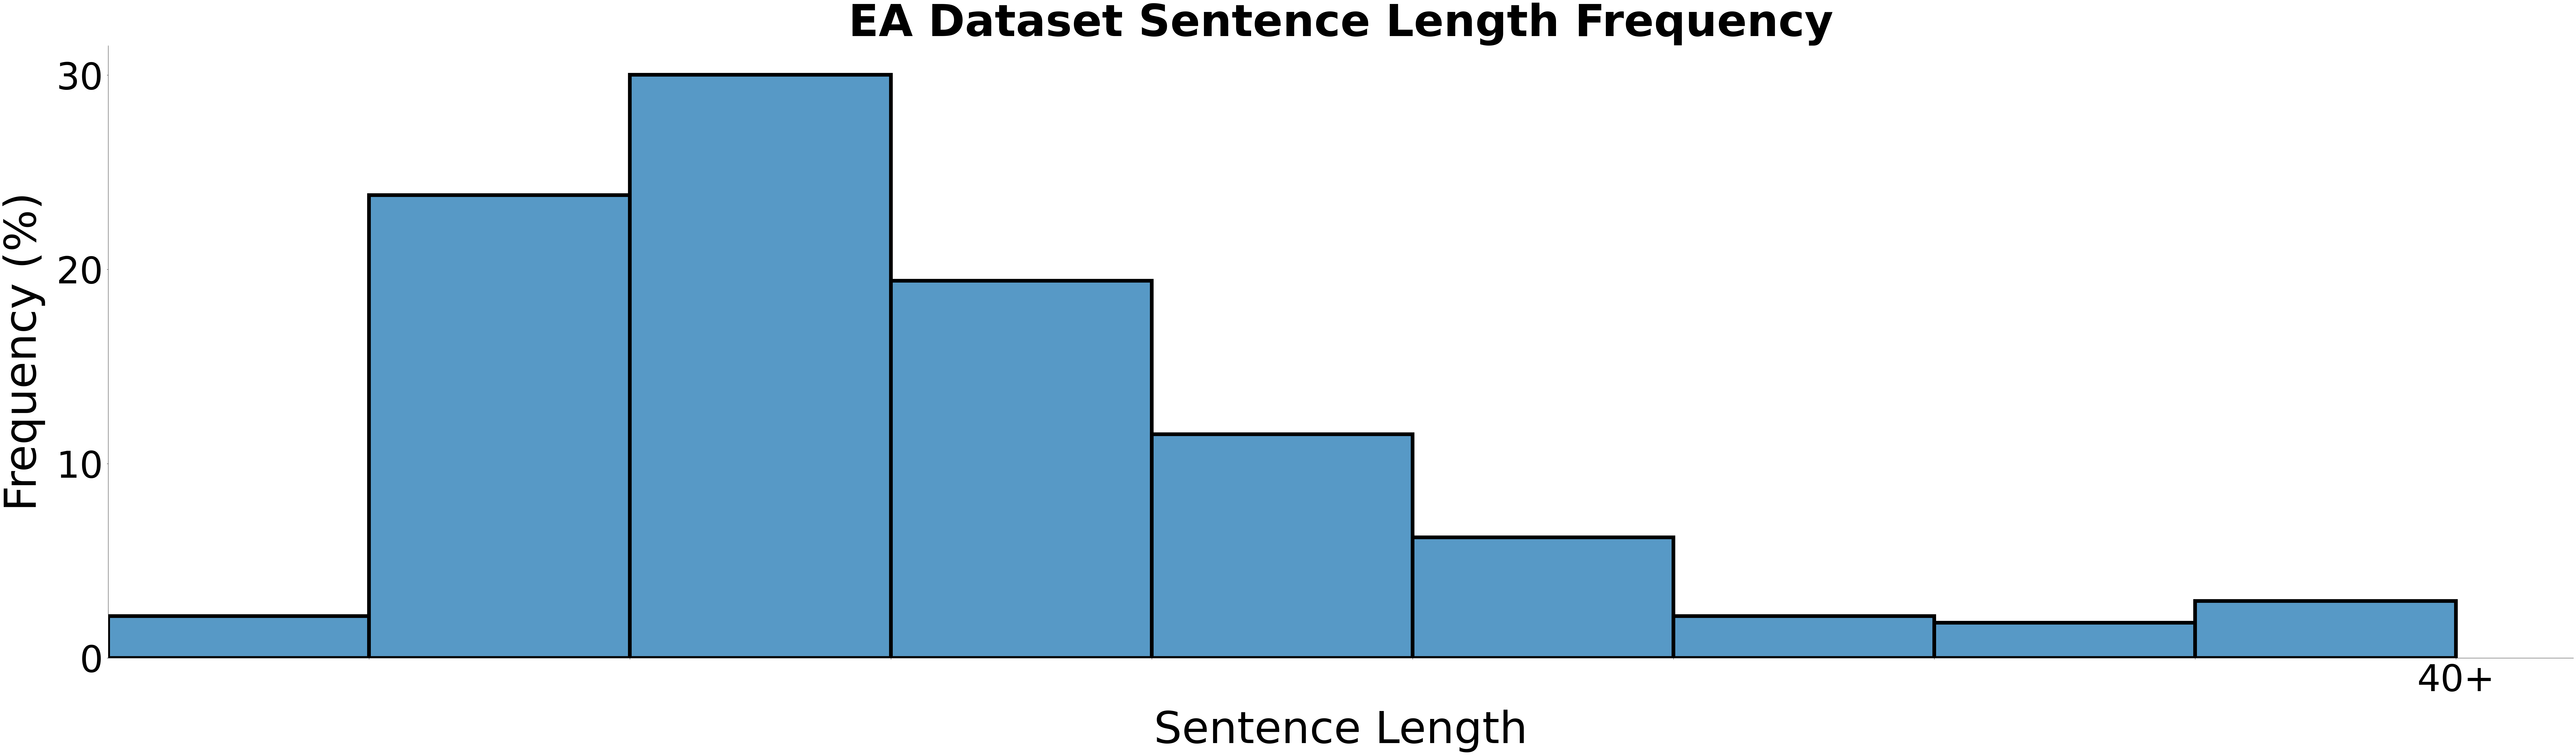

In [30]:


all_ = []
all_EA_less = []  
all_EA_more = []
all_EA = []
all_.extend(U)
all_.extend(D)  
for i in all_:
    word  = []
    word.extend(i.split())
    if len(word) < 40:
        all_EA_less.append(len(word))
        all_EA.append(len(word))
    else:
        all_EA_more.append(41)
        all_EA.append(41)


all_fdist = FreqDist(all_EA)
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(120,30))

all_plot = sns.histplot(data = all_EA,  bins = np.arange(0, max(all_EA)+5,5) , stat ='percent' ,edgecolor ='black', linewidth = 10)


all_plot.tick_params(left=True, bottom = True, labelsize=100, pad = 10)

all_plot.set_xlabel("Sentence Length",fontsize=120,labelpad = 30)
all_plot.set_ylabel("Frequency (%)",fontsize=120,labelpad = 30)
all_plot.set_title('EA Dataset Sentence Length Frequency',fontsize=120, weight ='bold', pad = 10)
all_plot.xaxis.set_ticks(np.arange(5, max(all_EA)+5, 5))
all_plot.yaxis.set_ticks(np.arange(0 ,35 ,10))
labels = [item.get_text() for item in all_plot.get_xticklabels()]
labels[-1] = '40+'

p = all_plot.patches
heights = ["height%d" % i for i in range(len(p))]

ax.set_xticklabels(labels)
plt.xticks(rotation=0);
plt.xlim(0)


sns.despine(right=True, left = False, bottom = False)

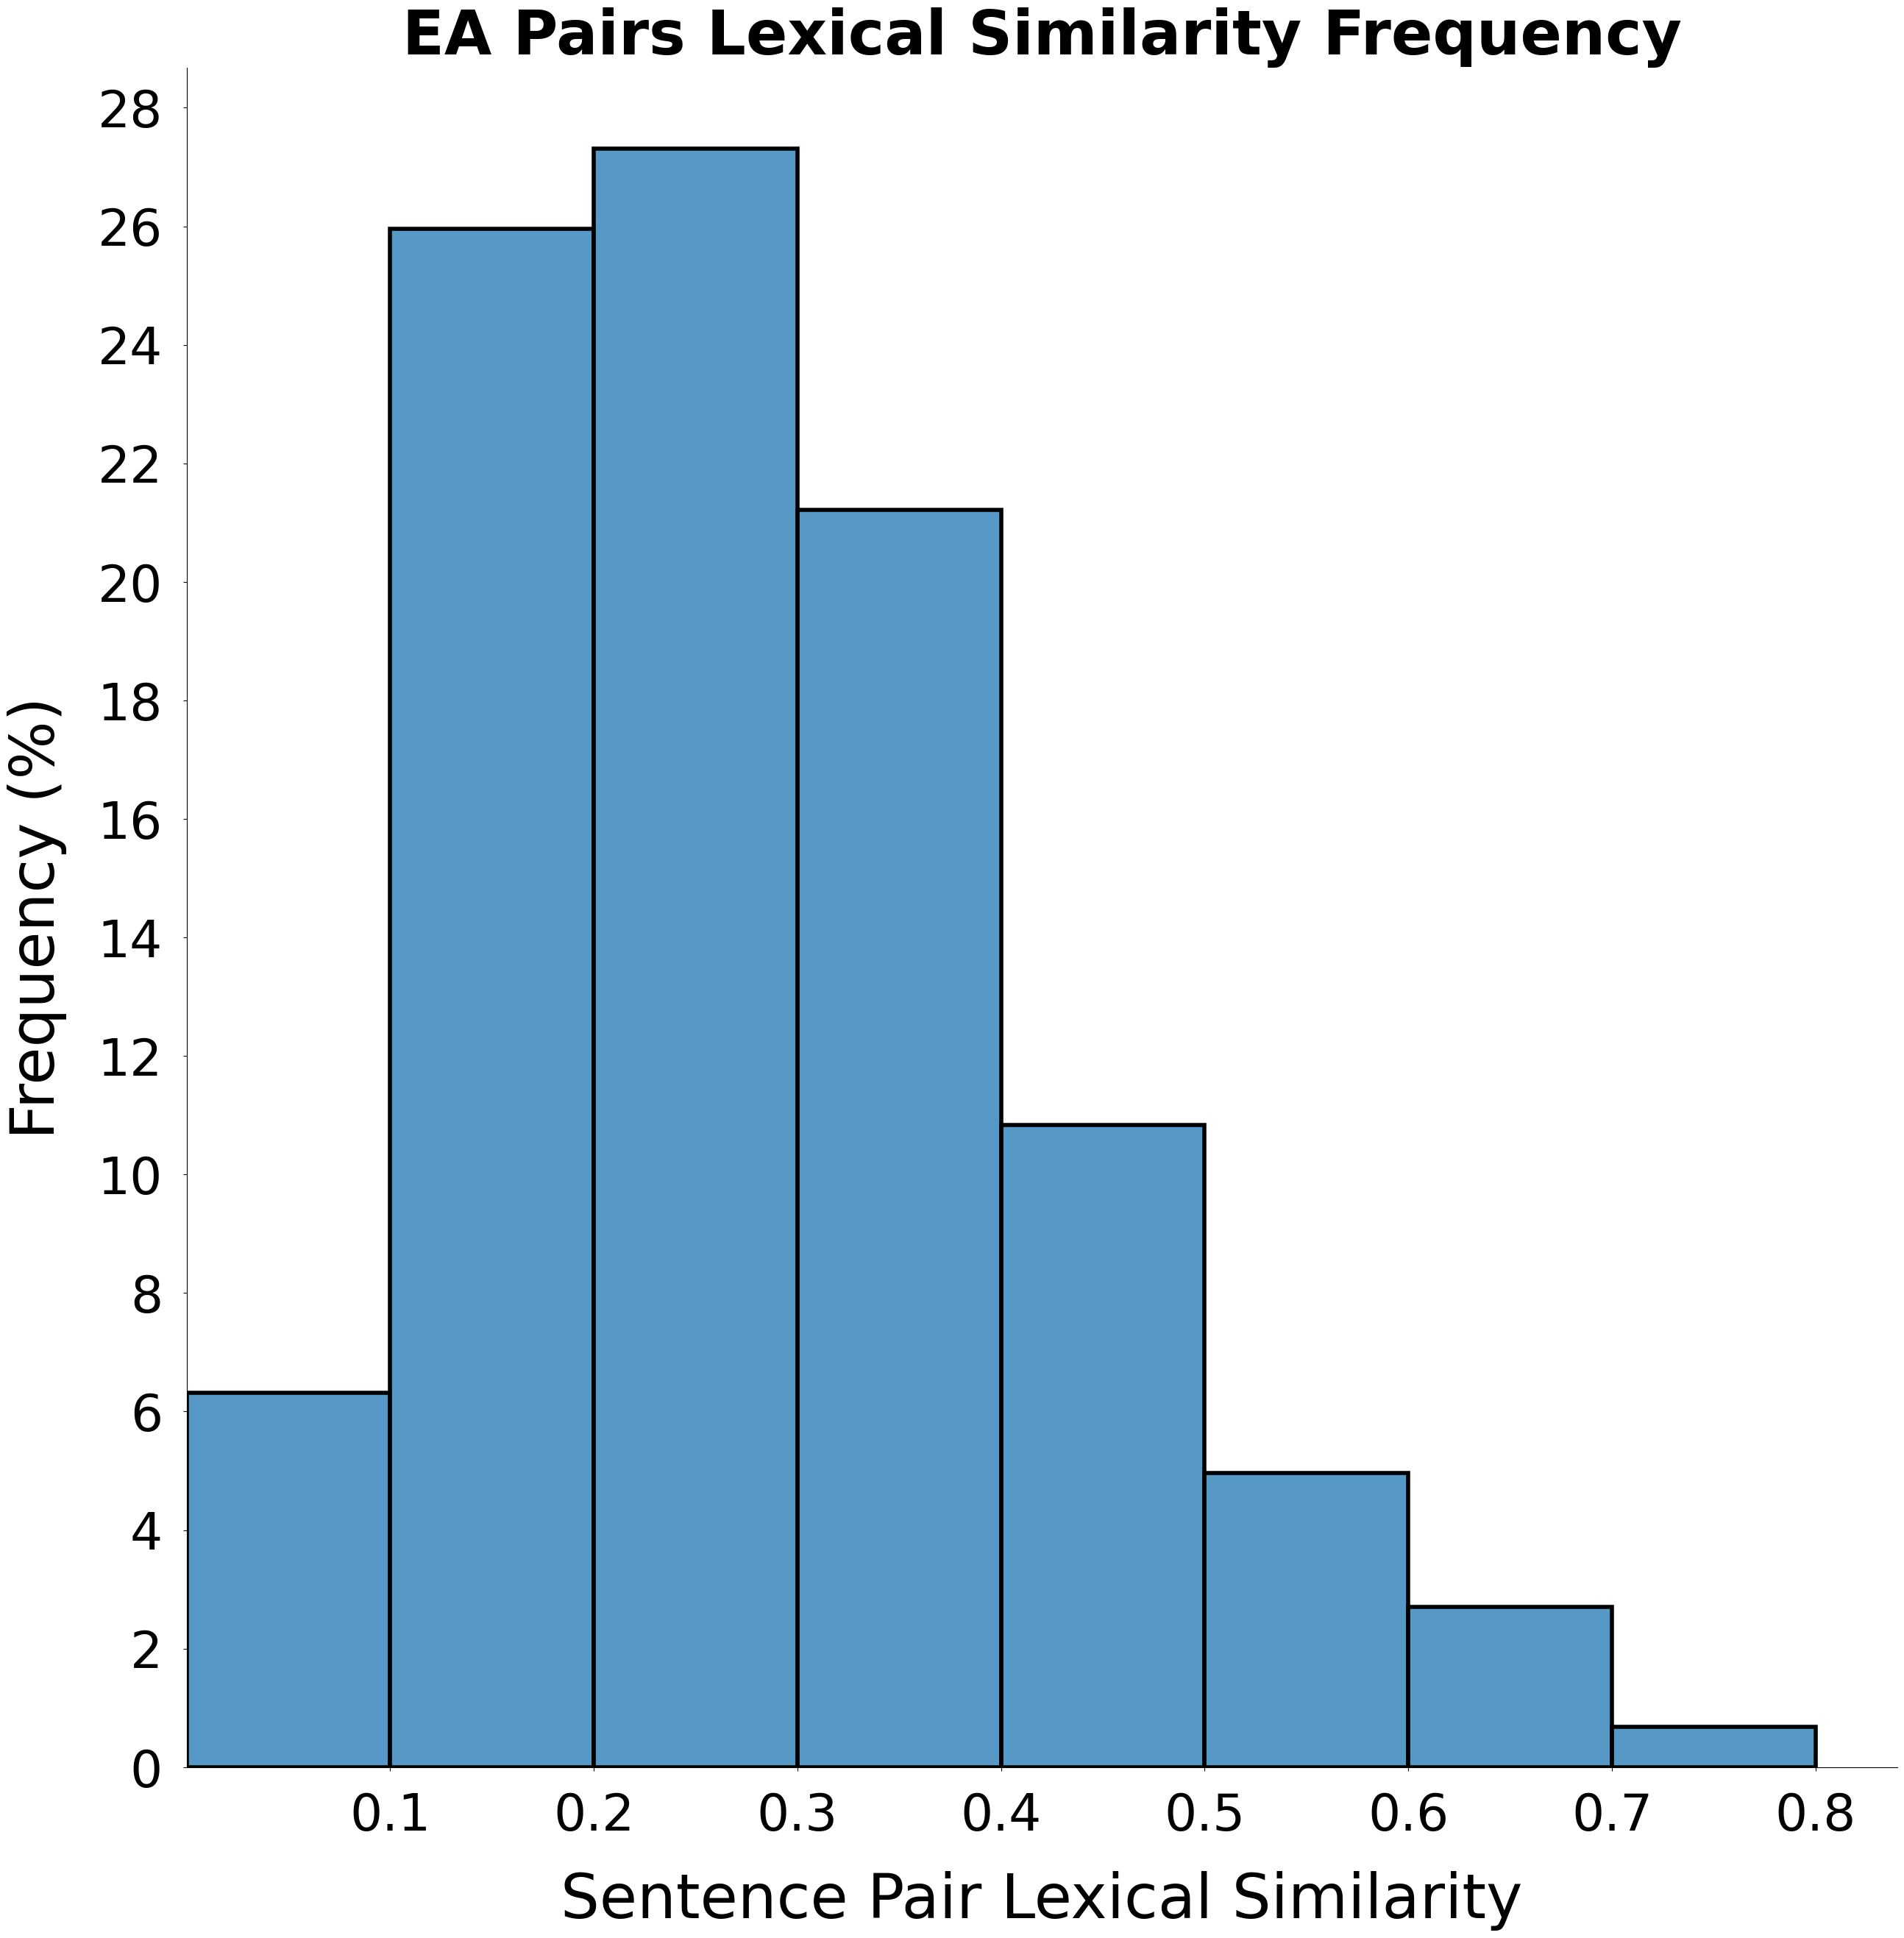

In [31]:
#average

def stop_list(x):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(['would','could','dont','us'])
    tokens_stop = []

    ## Check if token in stop word list before adding to new list
    for word in x.split():
        if word.lower().isalpha() in stopwords:
            pass
        else:
            tokens_stop.append(word)
    return(tokens_stop)
Sim = []

for i in range (len(U)):
    try:
        count = 0
        sent__1 = stop_list(U[i])
        sent__2 = stop_list(D[i])
        #print(len(sent__1))
        memory = []
        for j in sent__1:
            #print(j)
            #print(y[i].split())
            mem_q = []
            for q in sent__2:
                mem_q.append(q.lower())
                if j.lower() == q.lower():
                   
                    if  memory.count(j.lower()) +1 ==  mem_q.count(q.lower()):
                        #print(j)
                        memory.append(j.lower())
                        count+= 1
     
        
        Sim.append(((count/ len(sent__1))+ (count/ len(sent__2)))/2)
    except:
        print(i)


all_fdist = FreqDist(Sim)

all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(30,30))

all_plot = sns.histplot(data=Sim,  bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] , stat="percent", edgecolor ='black', linewidth = 4)
sns.despine(right=True);

all_plot.tick_params(left=True, bottom = True,labelsize=50, pad = 20)
all_plot.set_xlabel("Sentence Pair Lexical Similarity",fontsize=60,labelpad = 30)
all_plot.set_ylabel("Frequency (%)",fontsize=60,labelpad = 30)
all_plot.set_title('EA Pairs Lexical Similarity Frequency',fontsize=60, weight ='bold', pad = 5)
all_plot.xaxis.set_ticks(np.arange(0.1, 0.9, 0.1))
all_plot.yaxis.set_ticks(np.arange(0 ,30 ,2))
plt.xlim(0)
plt.xticks(rotation=0);


In [32]:
ALl_EA_words_token = []
for i in range (len (U)):
    ALl_EA_words_token.extend(lemmatize_sent(U[i]))
for i in range (len (D)):
    ALl_EA_words_token.extend(lemmatize_sent(D[i]))
ALl_EA_words_token_ = [lemmatize_sent(i)[0] for i in ALl_EA_words_token ]

In [33]:
all_EA_tokens_stopped = []
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['would','could','dont','us'])
## Check if token in stop word list before adding to new list
for word in ALl_EA_words_token_:
    if word.lower() in stopwords:
        pass
    elif word.isalpha():
        all_EA_tokens_stopped.append(word)

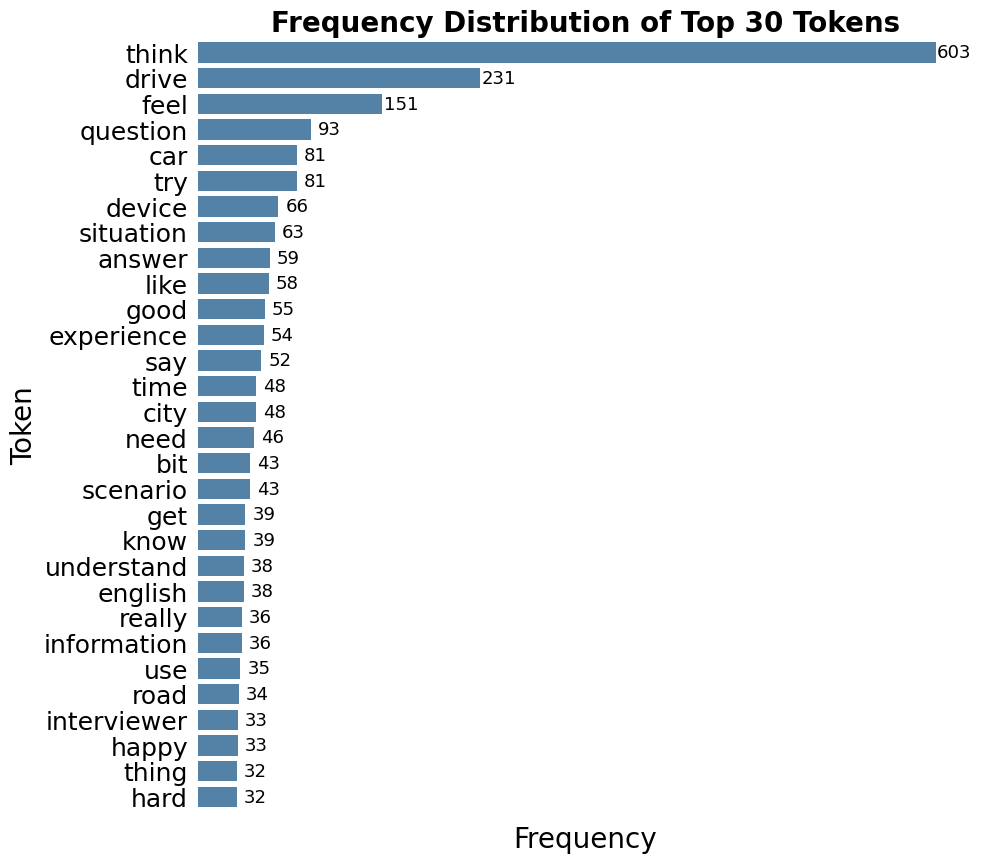

In [34]:
#lemmatized token distribution
all_fdist = FreqDist(all_EA_tokens_stopped).most_common(30)
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax, color = 'steelblue')
all_plot.xaxis.set_ticklabels([])
all_plot.tick_params(left=False, bottom = False,labelsize=18)

for i, v in enumerate(all_fdist.values):
    #print(i,v)
    all_plot.text( v+15,i+0.2,  str(v), ha='center',fontsize=13)

all_plot.set(ylabel = 'Words in the dataset', xlabel =' Frequency')#, 'Values')
all_plot.set_xlabel("Frequency",fontsize=20)
all_plot.set_ylabel("Token",fontsize=20)
all_plot.set_title('Frequency Distribution of Top 30 Tokens',fontsize=20, weight ='bold')
plt.xticks(rotation=0)
sns.despine(right=True, left = True, bottom = True)


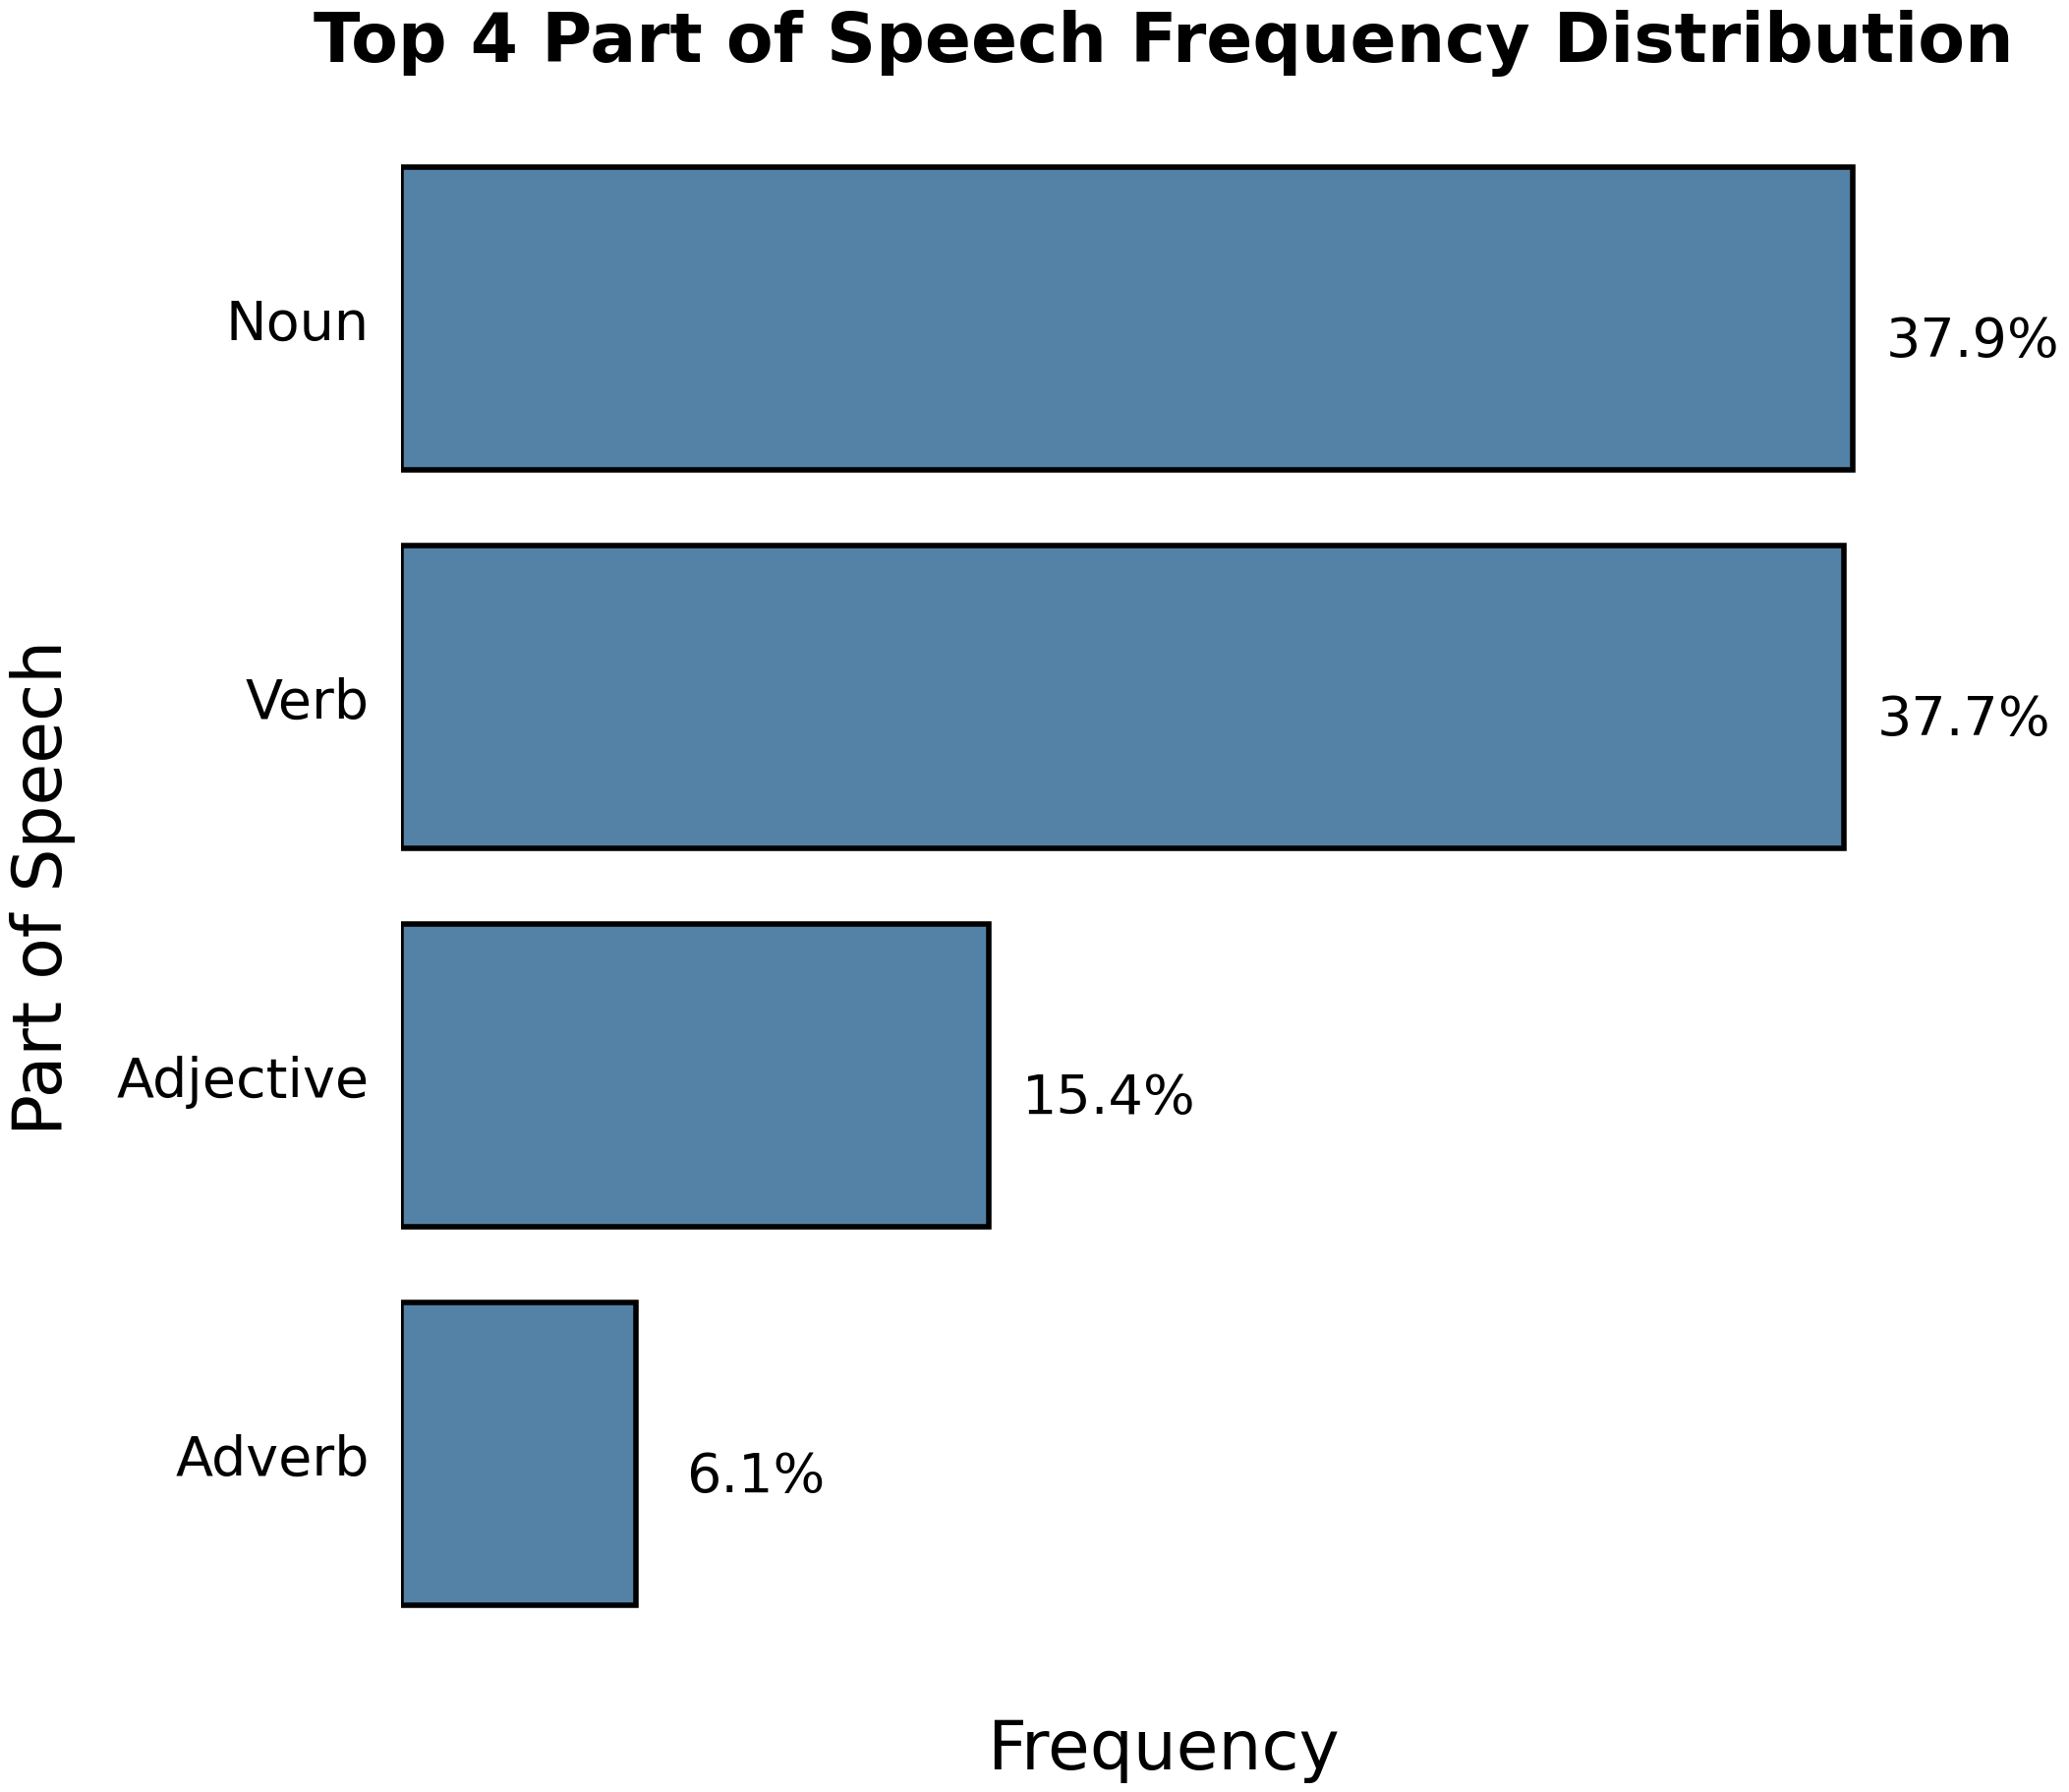

In [36]:


stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['would','could','dont','us'])


POS_tokens_stop = []
All_sent = [ ] 
All_sent.append(U)
All_sent.append(D)

for x in All_sent:
    token = word_tokenize(str(x))
    POS = nltk.pos_tag(token)
    for x in POS:
        if x[0].lower() in stopwords:
            pass
        elif x[0].isalpha():
            POS_tokens_stop.append(x[1])

combined_POS= []
for i in POS_tokens_stop:
    #print(i)
    if 'NN' in i:
        combined_POS.append('Noun')
        #print('NN')
    elif 'V' in i:
        combined_POS.append('Verb')
        #print('V')
    elif 'RB' in i:
        combined_POS.append('Adverb')
        #print('RB')
    elif 'PRP' in i:
        combined_POS.append('Pronoun')
        #print('PRon')
    elif 'JJ' in i:
        combined_POS.append('Adjective')
        #print('JJ')
    elif 'DT' in i:
        combined_POS.append('Determinant')
        #print('DT')
    elif 'MD' in i:
        combined_POS.append('Modal')
    elif 'IN' in i:
        combined_POS.append('Preposition') 
    elif 'IN' in i:
        combined_POS.append('Preposition') 
    elif 'CD' in i:
        combined_POS.append('Cardinal Digit')
    elif 'RP' in i:
        combined_POS.append('Article')
    else:
        #print(i)
        combined_POS.append(i)
    
all_fdist = FreqDist(combined_POS).most_common(4)
all_fdist = pd.Series(dict(all_fdist))


fig, ax = plt.subplots(figsize=(20,20))


all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax,color = 'steelblue', edgecolor = 'black', linewidth = 4)

all_plot.xaxis.set_ticklabels([])
all_plot.tick_params(left=False, bottom = False,labelsize=40, pad = 20)

for i, v in enumerate(all_fdist.values):
    #print(i,v)
    all_plot.text( v+190,i+0.1,  str((round((v/len(combined_POS))*100,1)))+'%', ha='center',fontsize=40)

all_plot.set_xlabel("Frequency",fontsize=50,labelpad = 30)
all_plot.set_ylabel("Part of Speech",fontsize=50,labelpad = 30)
all_plot.set_title('Top 4 Part of Speech Frequency Distribution',fontsize=50,pad =50, weight ='bold')
plt.xticks(rotation=0)
sns.despine(right=True, left = True, bottom = True)
